### OBJETIVO 

- Practicar el uso de APIs y peticiones HTTP.
- Automatizar procesos de exploración y limpieza usando `for loops`.
- Proteger nuestro código contra errores usando `try except`.

#### REQUISITOS 

- Haber realizado previamente la primer fase de limpieza de tu dataset

#### DESARROLLO

En este Postwork vamos a dejar descansar un poquito nuestro dataset. La única manera de entender a la perfección cómo utilizar APIs es usándolas. Y eso es lo que vamos a hacer. Vamos a elegir un API y construir un nuevo dataset utilizando peticiones HTTP y concatenaciones. Puede que sea un API que complemente tu dataset original (eso sería lo mejor de lo mejor), o puede simplemente que sea un API que ofrezca información que te parezca interesante. Los pasos a seguir son estos:

1. Encuentra un API que quieras explorar. Puedes encontrar una lista enorme de APIs gratuitas [aquí](https://github.com/public-apis/public-apis).
2. Crea una cuenta si es necesario.
3. Lee la documentación.
4. Realiza algunas peticiones de prueba para entender la estructura de los datos (si quieres explorar un poco, puedes intentar haacer peticiones usando [este software](https://www.postman.com/)).
5. Automatiza el proceso de realizar peticiones para obtener un dataset considerablemente grande.
6. Explora y limpia tu dataset.
7. Si has encontrado un dataset que complementa la información de tu dataset original (el que has estado trabajando durante todas las sesiones), ve si puedes unirlos en un solo `DataFrame` que incluya la información útil de ambos.

> **Extra**: Puedes también explorar la posibilidad de automatizar algunos de los procesos de limpieza que has realizado con tu dataset. Si encuentras dónde podría ser útil y te animas a hacerlo, recuerda proteger tu código con estructuras `try except` para que la automatización no falle.

##### (Para tu entrega final)

Esta entrega es opcional. Si quieren unos puntos extras, pueden entregar un Notebook extra donde hagan lo que se pide arriba. No es necesario entregar un documento escrito sobre esta entrega. Simplemente asegúrense que su código esté bien comentado y ordenado.

In [1]:
# Modulos a utilizar
import pandas as pd
import requests 
import numpy as np

Elegimos la **API de Binance**(Una exchange de criptomonedas muy popular). Para obtener precios en velas japoneses de criptomonedas dada una lista de sus nombres. En la [documentación](https://github.com/binance/binance-spot-api-docs/blob/master/rest-api.md) se puede ver los nombres de las columnas de nuestro request. Por los limites de la API solo podemos consultar información de las ultimas 500 horas y no es necesario registrarse en la pagina.


# Peticiones

In [2]:
# Precios en hora del Bitcoin en "dolares"----> BTCUSDT 
url = 'https://api.binance.com/api/v3/klines' # Velas Japonesas
params = {
  'symbol': 'BTCUSDT',
  'interval': '1h'
}
response = requests.get(url, params=params)
klines = response.json()
klines

[[1627020000000,
  '32622.37000000',
  '32639.42000000',
  '32490.00000000',
  '32574.99000000',
  '1596.52892000',
  1627023599999,
  '51996878.65590617',
  32294,
  '805.45054800',
  '26231329.12541423',
  '0'],
 [1627023600000,
  '32576.00000000',
  '32598.03000000',
  '32360.67000000',
  '32490.00000000',
  '1845.65833200',
  1627027199999,
  '59915033.43579602',
  31461,
  '878.83864600',
  '28526142.81977229',
  '0'],
 [1627027200000,
  '32489.99000000',
  '32540.20000000',
  '32285.57000000',
  '32318.75000000',
  '2198.49338600',
  1627030799999,
  '71271688.11015983',
  51799,
  '946.91087600',
  '30704826.67123945',
  '0'],
 [1627030800000,
  '32318.75000000',
  '32475.00000000',
  '32266.00000000',
  '32325.17000000',
  '1749.05040100',
  1627034399999,
  '56644164.61633146',
  91839,
  '716.03881300',
  '23188640.64508193',
  '0'],
 [1627034400000,
  '32324.52000000',
  '32384.66000000',
  '32210.00000000',
  '32330.30000000',
  '1590.23360200',
  1627037999999,
  '51357266

In [3]:
len(klines)

500

In [4]:
# Función para transformar la lista anterior en data frame
def klines_to_df(data):  
    # Nombres de las columnas en https://www.programcreek.com/python/?CodeExample=get+klines
    col_names = ['Open_time', 'Open', 'High', 'Low', 'Close', 'Volume', 
                 'Close_time', 'Quote_asset_volume', 'Number_of_trades', 
                'Taker_buy_base_asset_volume', 'Taker_buy_quote_asset_volume', 'Can_be_ignored']
    data = pd.DataFrame(data, columns = col_names)
    
    # Limpieza y Tipos de datos
    data["Open_time"] = pd.to_datetime(data["Open_time"], unit = "ms")
    data["Close_time"] = pd.to_datetime(data["Close_time"], unit = "ms")
    data['Open'] = data['Open'].astype(np.float32)
    data['High'] = data['High'].astype(np.float32)
    data['Low'] = data['Low'].astype(np.float32)
    data['Close'] = data['Close'].astype(np.float32)
    data['Number_of_trades'] = data['Number_of_trades'].astype(np.int32)
    
    return data

In [5]:
klines_to_df(klines)

,Open_time,Open,High,Low,Close,Volume,Close_time,Quote_asset_volume,Number_of_trades,Taker_buy_base_asset_volume,Taker_buy_quote_asset_volume,Can_be_ignored
0,2021-07-23 06:00:00,32622.369141,32639.419922,32490.000000,32574.990234,1596.52892000,2021-07-23 06:59:59.999,51996878.65590617,32294,805.45054800,26231329.12541423,0
1,2021-07-23 07:00:00,32576.000000,32598.029297,32360.669922,32490.000000,1845.65833200,2021-07-23 07:59:59.999,59915033.43579602,31461,878.83864600,28526142.81977229,0
2,2021-07-23 08:00:00,32489.990234,32540.199219,32285.570312,32318.750000,2198.49338600,2021-07-23 08:59:59.999,71271688.11015983,51799,946.91087600,30704826.67123945,0
3,2021-07-23 09:00:00,32318.750000,32475.000000,32266.000000,32325.169922,1749.05040100,2021-07-23 09:59:59.999,56644164.61633146,91839,716.03881300,23188640.64508193,0
4,2021-07-23 10:00:00,32324.519531,32384.660156,32210.000000,32330.300781,1590.23360200,2021-07-23 10:59:59.999,51357266.65047123,60857,746.60240700,24113685.90510659,0
...,...,...,...,...,...,...,...,...,...,...,...,...
495,2021-08-12 21:00:00,44474.960938,44538.000000,44142.000000,44242.128906,1127.54819500,2021-08-12 21:59:59.999,49965362.91785404,39702,524.70330700,23251377.62313275,0
496,2021-08-12 22:00:00,44242.128906,44295.378906,43855.878906,43954.589844,1451.94004700,2021-08-12 22:59:59.999,63937321.05592978,45436,652.55773500,28736831.84658941,0
497,2021-08-12 23:00:00,43954.421875,44535.988281,43948.378906,44399.000000,1753.36767700,2021-08-12 23:59:59.999,77719346.31988542,48016,888.30920500,39365940.33153207,0
498,2021-08-13 00:00:00,44400.058594,44675.691406,44217.390625,44493.691406,2803.71791300,2021-08-13 00:59:59.999,124738547.32793054,131116,1462.23033700,65048016.82487806,0


# Automatización

In [6]:
# Automatización: obtener los precios de varias criptomonedas
url = 'https://api.binance.com/api/v3/klines' # Velas Japonesas
criptomonedas = ['BTCUSDT', 'ADAUSDT', 'SHIBUSDT', 'ETHUSDT']
intervalo = "1h" # m -> minutes; h -> hours; d -> days; w -> weeks; M -> months
lista_df = []
for cripto in criptomonedas:
    try:
        params = {
              'symbol': cripto,
              'interval': intervalo
                 }
        response = requests.get(url, params = params)
        velas = klines_to_df(response.json())
        velas["cripto"] = cripto # Columna con nombre de la criptomoneda
        lista_df.append(velas)
    except:
        print("Hubo en error al consultar las velas japonesas para:", cripto)

In [7]:
# Uniendo dataframes
criptos_df = pd.concat(lista_df)

# Exploración Data Set

In [8]:
criptos_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 499
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Open_time                     2000 non-null   datetime64[ns]
 1   Open                          2000 non-null   float32       
 2   High                          2000 non-null   float32       
 3   Low                           2000 non-null   float32       
 4   Close                         2000 non-null   float32       
 5   Volume                        2000 non-null   object        
 6   Close_time                    2000 non-null   datetime64[ns]
 7   Quote_asset_volume            2000 non-null   object        
 8   Number_of_trades              2000 non-null   int32         
 9   Taker_buy_base_asset_volume   2000 non-null   object        
 10  Taker_buy_quote_asset_volume  2000 non-null   object        
 11  Can_be_ignored                2

In [9]:
criptos_df.shape

(2000, 13)

In [10]:
# Criptomonedas
criptos_df.cripto.unique()

array(['BTCUSDT', 'ADAUSDT', 'SHIBUSDT', 'ETHUSDT'], dtype=object)

In [11]:
criptos_df.columns

Index(['Open_time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close_time',
       'Quote_asset_volume', 'Number_of_trades', 'Taker_buy_base_asset_volume',
       'Taker_buy_quote_asset_volume', 'Can_be_ignored', 'cripto'],
      dtype='object')

In [12]:
criptos_df.head()

,Open_time,Open,High,Low,Close,Volume,Close_time,Quote_asset_volume,Number_of_trades,Taker_buy_base_asset_volume,Taker_buy_quote_asset_volume,Can_be_ignored,cripto
0,2021-07-23 06:00:00,32622.369141,32639.419922,32490.000000,32574.990234,1596.52892000,2021-07-23 06:59:59.999,51996878.65590617,32294,805.45054800,26231329.12541423,0,BTCUSDT
1,2021-07-23 07:00:00,32576.000000,32598.029297,32360.669922,32490.000000,1845.65833200,2021-07-23 07:59:59.999,59915033.43579602,31461,878.83864600,28526142.81977229,0,BTCUSDT
2,2021-07-23 08:00:00,32489.990234,32540.199219,32285.570312,32318.750000,2198.49338600,2021-07-23 08:59:59.999,71271688.11015983,51799,946.91087600,30704826.67123945,0,BTCUSDT
3,2021-07-23 09:00:00,32318.750000,32475.000000,32266.000000,32325.169922,1749.05040100,2021-07-23 09:59:59.999,56644164.61633146,91839,716.03881300,23188640.64508193,0,BTCUSDT
4,2021-07-23 10:00:00,32324.519531,32384.660156,32210.000000,32330.300781,1590.23360200,2021-07-23 10:59:59.999,51357266.65047123,60857,746.60240700,24113685.90510659,0,BTCUSDT


array([<AxesSubplot:xlabel='Close_time'>,
       <AxesSubplot:xlabel='Close_time'>,
       <AxesSubplot:xlabel='Close_time'>,
       <AxesSubplot:xlabel='Close_time'>], dtype=object)

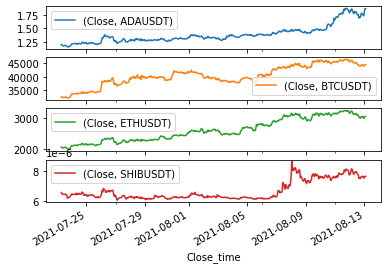

In [13]:
# Serie de tiempo de las precios
pd.pivot_table(criptos_df, values = ["Close"], index = ["Close_time"], columns = ["cripto"]).plot(subplots = True)

# Anexo

Obtener varios pares de criptomonedas(nombres)

In [14]:
# Pares de criptomonedas por ejemplo: EHTUSDT
import pandas as pd
import requests

endpoint = "https://api.binance.com/api/v3/ticker/price"
payload = {'api_key': 'tu_api_key_va_aqui'}
r = requests.get(endpoint)
r.status_code
r.json()

[{'symbol': 'ETHBTC', 'price': '0.06878100'},
 {'symbol': 'LTCBTC', 'price': '0.00376100'},
 {'symbol': 'BNBBTC', 'price': '0.00877500'},
 {'symbol': 'NEOBTC', 'price': '0.00109500'},
 {'symbol': 'QTUMETH', 'price': '0.00339500'},
 {'symbol': 'EOSETH', 'price': '0.00152500'},
 {'symbol': 'SNTETH', 'price': '0.00003016'},
 {'symbol': 'BNTETH', 'price': '0.00129900'},
 {'symbol': 'BCCBTC', 'price': '0.07908100'},
 {'symbol': 'GASBTC', 'price': '0.00020650'},
 {'symbol': 'BNBETH', 'price': '0.12754000'},
 {'symbol': 'BTCUSDT', 'price': '44498.79000000'},
 {'symbol': 'ETHUSDT', 'price': '3060.52000000'},
 {'symbol': 'HSRBTC', 'price': '0.00041400'},
 {'symbol': 'OAXETH', 'price': '0.00017780'},
 {'symbol': 'DNTETH', 'price': '0.00002801'},
 {'symbol': 'MCOETH', 'price': '0.00577200'},
 {'symbol': 'ICNETH', 'price': '0.00166300'},
 {'symbol': 'MCOBTC', 'price': '0.00021140'},
 {'symbol': 'WTCBTC', 'price': '0.00002196'},
 {'symbol': 'WTCETH', 'price': '0.00023700'},
 {'symbol': 'LRCBTC', 'p